# Stellar Evolution Table interpollations
*Parse table from csv file*

In [40]:
from pandas import read_csv


df = read_csv('stellar_evolution.csv')
df = df.set_index(df.mass)
df.head()

,mass,type,temp,l_min,l_max,m_span,s_span,g_span
mass,,,,,,,,
2.0,2.0,A5,8200,16.0,20.0,1.3,0.2,0.1
1.9,1.9,A6,8000,13.0,16.0,1.5,0.2,0.1
1.8,1.8,A7,7800,11.0,13.0,1.8,0.3,0.2
1.7,1.7,A9,7500,8.6,10.0,2.1,0.3,0.2
1.6,1.6,F0,7300,6.7,8.2,2.5,0.4,0.2


## Fitting temperature
*Fit of temperature values as a forth-degree polynomial*

In [133]:
from scipy.optimize import curve_fit
from numpy import sin

x = df.index
y = df.temp
popt, _ = curve_fit(lambda x, a, b, c, d, e: a * x ** 4 + b * x ** 3 + c * x ** 2 + d * x + e, x, y)
a, b, c, d, e = popt
a, b, c, d, e

(1659.4884130666383,
 -7449.958040879493,
 10805.399314976361,
 -2568.323443806999,
 3296.2303340370468)

*Predict and score interpollated values with a $r^2$ fitness score*

In [134]:
import numpy as np

temp = x.map(lambda x: a * x ** 4 + b * x ** 3 + c * x ** 2 + d * x + e)
r2 = 1 - (np.sum((y - temp) ** 2) / np.sum((y - np.mean(y)) ** 2))
r2

0.9968416442616412

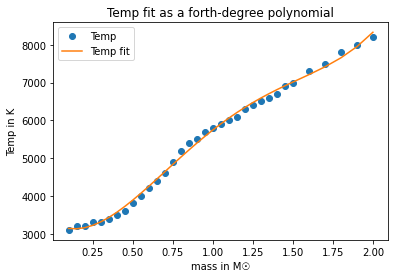

In [136]:
import matplotlib.pyplot as plt


_, ax = plt.subplots()
ax.set_title(r"Temp fit as a forth-degree polynomial")
ax.plot(x, y, 'o', label='Temp')
ax.plot(x, temp, '-', label='Temp fit')
ax.set_xlabel('mass in M☉')
ax.set_ylabel('Temp in K')
ax.legend()
plt.show()

## Fitting min an max luminosities
### L-Min fit
*Fit of lmin values as $ax^b$*

In [44]:
x = df.index
y = df.l_min
popt, _ = curve_fit(lambda x, a, b: a * x ** b, x, y)
a, b = popt
a, b

(0.8994825154104518, 4.182711149771404)

*Predict and score interpollated values with a $r^2$ fitness score*

In [45]:
l_min = x.map(lambda x: a * x ** b)
r2 = 1 - (np.sum((y - l_min) ** 2) / np.sum((y - np.mean(y)) ** 2))
r2

0.9981403450049346

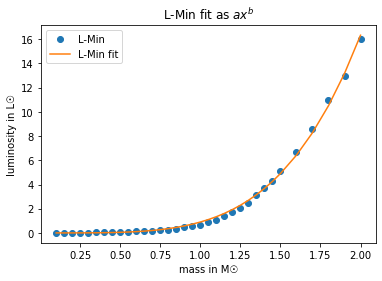

In [46]:
_, ax = plt.subplots()
ax.set_title(r"L-Min fit as $ax^b$")
ax.plot(x, y, 'o', label='L-Min')
ax.plot(x, l_min, '-', label='L-Min fit')
ax.set_xlabel('mass in M☉')
ax.set_ylabel('luminosity in L☉')
ax.legend()
plt.show()

*All l_min predicted values for mass \[.1, 2.0\] must be greater than 0*

In [47]:
all(v >= 0 for v in l_min)

True

### L-Max fit
*Fit of lmax values as $ax^b$*

In [48]:
df_filtered = df[df.index >= .45]
x = df_filtered.index
y = df_filtered.l_max
popt, _ = curve_fit(lambda x, a, b: a * x ** b, x, y)
a, b = popt
a, b

(1.417549268949681, 3.786542028176919)

In [49]:
l_max = x.map(lambda x: a * x ** b)
r2 = 1 - (np.sum((y - l_max) ** 2) / np.sum((y - np.mean(y)) ** 2))
r2

0.9987815353130644

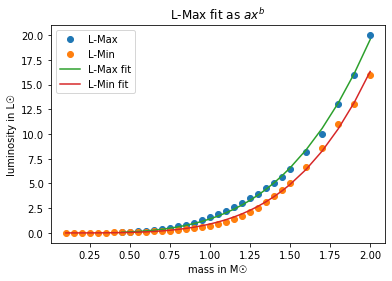

In [50]:
_, ax = plt.subplots()
ax.set_title(r"L-Max fit as $ax^b$")
ax.plot(x, y, 'o', label='L-Max')
ax.plot(df.index, df.l_min, 'o', label='L-Min')
ax.plot(x, l_max, '-', label='L-Max fit')
ax.plot(df.index, l_min, '-', label='L-Min fit')
ax.set_xlabel('mass in M☉')
ax.set_ylabel('luminosity in L☉')
ax.legend()
plt.show()

*All l_max predicted values for mass [.45, 2.0] must be greater than predicted l_min values*

In [51]:
diff = [l_max[i] - l_min[i] for i in range(len(df_filtered.index))]
all(d >= 0 for d in diff)

True

## Fitting spans
### M-Span fit
*Fit of mspan values as $ae^{bx}+c$*

In [52]:
df_filtered = df[df.index >= .45]
x = df_filtered.index
y = df_filtered.m_span
popt, _ = curve_fit(lambda x, a, b, c: a * np.exp(b * x) + c, x, y)
a, b, c = popt
a, b, c

(355.2573273345443, -3.623944651847095, 1.1984270816978497)

In [53]:
m_span = x.map(lambda x: a * np.exp(b * x) + c)
r2 = 1 - (np.sum((y - m_span) ** 2) / np.sum((y - np.mean(y)) ** 2))
r2

0.9990442441678579

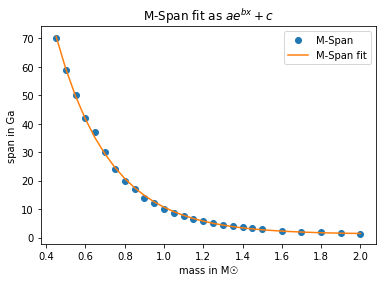

In [54]:
_, ax = plt.subplots()
ax.set_title(r"M-Span fit as $ae^{bx}+c$")
ax.plot(x, y, 'o', label='M-Span')
ax.plot(x, m_span, '-', label='M-Span fit')
ax.set_xlabel('mass in M☉')
ax.set_ylabel('span in Ga')
ax.legend()
plt.show()

*All m_span predicted values for mass \[.45, 2.0\] must be greater than 0*

In [55]:
all(v >= 0 for v in m_span)

True

### S-Span fit
*Fit of sspan values as $ae^{bx}$*

In [56]:
df_filtered = df[df.index >= .95]
x = df_filtered.index
y = df_filtered.s_span
popt, _ = curve_fit(lambda x, a, b: a * np.exp(b * x), x, y)
a, b = popt
a, b

(18.445568275396568, -2.471832533773299)

In [57]:
s_span = x.map(lambda x: a * np.exp(b * x))
r2 = 1 - (np.sum((y - s_span) ** 2) / np.sum((y - np.mean(y)) ** 2))
r2

0.9903685923306617

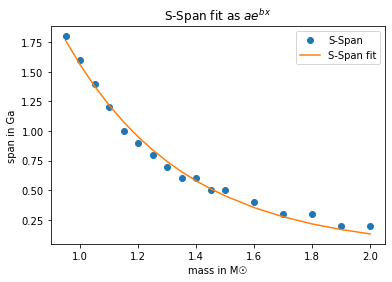

In [58]:
_, ax = plt.subplots()
ax.set_title(r"S-Span fit as $ae^{bx}$")
ax.plot(x, y, 'o', label='S-Span')
ax.plot(x, s_span, '-', label='S-Span fit')
ax.set_xlabel('mass in M☉')
ax.set_ylabel('span in Ga')
ax.legend()
plt.show()

*All s_span predicted values for mass \[.95, 2.0\] must be greater than 0*

In [59]:
all(v >= 0 for v in s_span)

True

### G-Span fit
*Fit of gspan values as $ae^{bx}$*

In [60]:
df_filtered = df[df.index >= .95]
x = df_filtered.index
y = df_filtered.g_span
popt, _ = curve_fit(lambda x, a, b: a * np.exp(b * x), x, y)
a, b = popt
a, b

(11.045171731219448, -2.4574060414344223)

In [61]:
g_span = x.map(lambda x: a * np.exp(b * x))
r2 = 1 - (np.sum((y - g_span) ** 2) / np.sum((y - np.mean(y)) ** 2))
r2

0.984675206966851

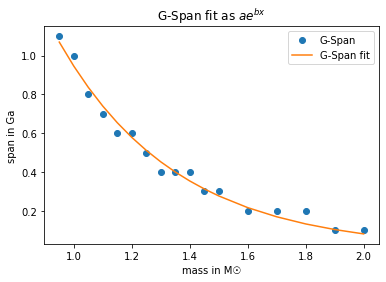

In [62]:
_, ax = plt.subplots()
ax.set_title(r"G-Span fit as $ae^{bx}$")
ax.plot(x, y, 'o', label='G-Span')
ax.plot(x, g_span, '-', label='G-Span fit')
ax.set_xlabel('mass in M☉')
ax.set_ylabel('span in Ga')
ax.legend()
plt.show()

*All g_span predicted values for mass \[.95, 2.0\] must be greater than 0*

In [63]:
all(v >= 0 for v in g_span)

True